# Install & Import

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:

# !pip install pandas-profiling[notebook]  
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
    
    
import numpy as np
import pandas as pd
import tensorflow as tf
import torch
import seaborn as sns
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport

from sklearn.datasets import fetch_openml
from scipy import stats
from statsmodels.datasets import get_rdataset
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller, kpss


from tqdm import tqdm, trange
import time

# for i in tqdm(range(100), desc="Test1") :
#     time.sleep(0.001)
    
# for i in tqdm(range(100), desc="Test2") :
#     time.sleep(0.001)

In [2]:
!pip install pqdm

You should consider upgrading via the 'C:\Users\SNUAI\anaconda3\python.exe -m pip install --upgrade pip' command.


# Check GPU is available 

In [3]:
physical_devices = tf.config.list_physical_devices('GPU')
print("# of GPUs : ", len(physical_devices))
from tensorflow.python.client import device_lib
import tensorflow as tf 
print(tf.config.list_logical_devices())
tf.debugging.set_log_device_placement(True)
#print("# of GPUs : ", len(physical_devices))


# of GPUs :  1
[LogicalDevice(name='/device:CPU:0', device_type='CPU'), LogicalDevice(name='/device:GPU:0', device_type='GPU')]


# Utility Functions

## Show basic info of np/df

In [4]:
# print np or df information
def print_data_info(data, msg="") :
    if( type(data) == type ( np.empty([2, 2]) ) ) :

        print("\n============================")
        print(msg)
        print("============================")
        print("Type : ",  type(data))
        print("Shape : ", data.shape)
        print("Unique : ", np.unique(data, return_counts=True))
        print("Data : ", data)
        print("============================\n")
    elif ( type(data) == type(pd.DataFrame([1])) ) :
        print("\n============================")
        print(msg)
        print("============================")
        print(type(data))
        print("Unique : ", np.unique(np.array(data), return_counts=True))
        print(data.info())
        print(data.head())
        print("============================\n")
    else :
        print("\n============================")
        print(msg)
        print("============================")
        print(type(data))
        print("Data : ", data)
        print("============================\n")
    

## Show Data Frame Analysis

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Advertising.csv', usecols=[1,2,3,4])

def boxplot(df, col):
    sns.boxplot(data=df,x=df[f"{col}"])
    plt.title(f"Feature {col}")
    plt.show()

def show_df_info(data, x=None, hue=None):
    print("show_df_info : ", x)
    display(data.head(3))

    fig, axes = plt.subplots(1,2, figsize=(10, 5))
    # fig.suptitle('Features')
    #sns.histplot(data=penguins, x="flipper_length_mm", kde=True)
    #sns.histplot(x=x, data=data, kde=True, hue=hue)

    sns.histplot(ax=axes[0], data=data, x=x, kde=True) #, hue=hue)    
    sns.boxplot(ax=axes[1], data=data[x])
    plt.show()


def print_df_info(df) :
    print("====================================================================")
    print("=           DataFrame Information                                  =")
    print("====================================================================")
    print(df.info())

    print("====================================================================")
    display(df.head(3))
    print("====================================================================")
    print()


    print("====================================================================")
    print("[Columns]\t", df.columns)
    print("====================================================================")
    print()

    print("====================================================================")
    print("[INDICES]\t",df.index)
    print("====================================================================")

    print()
    print("====================================================================")
    print("=           DataFrame Description                                  =")
    print("====================================================================")

    print(df.describe())
    print("====================================================================")



    for col in df.columns :
        print("====================================================================")
        print("[ " +  str(col) + " ]")
        print("====================================================================")
        show_df_info(df, col)

        print(str(col) + "   Unique : ", df[col].unique())
        print("--------------------------------------------------------------------")
        print(str(col) + "   N unique : ", df[col].nunique())
        print("--------------------------------------------------------------------")
        print(str(col) + "   Value Counts : ", df[col].value_counts())
        print("--------------------------------------------------------------------")
        print()
        print()
        print()

        
    sns.pairplot(df)
    plt.show()

    plt.figure(figsize=(15, 10))
    sns.heatmap(df, cmap=sns.cubehelix_palette(as_cmap=True))
    plt.show()


# print_df_info(df)

# Read Data

In [11]:

path = './data'

#!ls ./

df_strain = pd.read_csv(f'{path}/S_train.csv')
df_xtrain = pd.read_csv(f'{path}/X_train.csv')
df_xtest = pd.read_csv(f'{path}/X_test.csv')
df_ytrain = pd.read_csv(f'{path}/Y_train.csv')

In [12]:
!ls '/content/drive/MyDrive/Colab Notebooks/data'
!pwd

ls: cannot access '/content/drive/MyDrive/Colab Notebooks/data': No such file or directory


/c/Users/SNUAI/Excercise/ML_Excercise/ML_SNU


# Show DataFrame Info (0/1/2/3)

In [13]:


display(df_strain.head(2))
display(df_ytrain.head(2))

df_sy = pd.concat([df_strain, df_ytrain], axis=1)
display(df_sy.head(3))
df_sy.columns = ["yield", "class"]
display(df_sy.head(3))

# print_df_info(df_xtrain)
# print_df_info(df_ytrain)
# print_df_info(df_strain)
# print_df_info( (df_sy.loc[ df_sy["class"]==0, : ]) )
# print_df_info( (df_sy.loc[ df_sy["class"]==1, : ]) )
# print_df_info( (df_sy.loc[ df_sy["class"]==2, : ]) )
# print_df_info( (df_sy.loc[ df_sy["class"]==3, : ]) )



,0
0,0.933333
1,0.966667


,0
0,0
1,0


,0,0
0,0.933333,0
1,0.966667,0
2,1.000000,0


,yield,class
0,0.933333,0
1,0.966667,0
2,1.000000,0


# Continuous & Discrete Data Exploration

In [14]:
df_xtrain_continuous = df_xtrain.iloc[:,:92]
df_xtrain_discrete = df_xtrain.iloc[:,93:2090]
df_xtrain_continuous_T = df_xtrain.iloc[:,:92].T
df_xtrain_discrete_T = df_xtrain.iloc[:,93:2090].T


In [ ]:
def gen_profile():
    profile = ProfileReport(df_xtrain_continuous, minimal=True,explorative=True)
    # for large dataset minimal is True, and explorative as True
    # profile.widgets()
    # Saving file to in JSON and HTML format
    # To HTML
    profile.to_file(f"{path}/df_xtrain_continuous_1208_01.html")
    # # To JSON
    # json_data = profile.to_json()
    # # As a file
    # profile.to_file("your_report.json")

    profile = ProfileReport(df_xtrain_discrete, minimal=True,explorative=True)
    # profile.widgets()
    profile.to_file(f"{path}/df_xtrain_discrete_1208_01.html")

    profile = ProfileReport(df_xtrain_continuous_Y, minimal=True,explorative=True)
    # profile.widgets()
    profile.to_file(f"{path}/df_xtrain_continuous_1208_01.html")

    profile = ProfileReport(df_xtrain_discrete_T, minimal=True,explorative=True)
    # profile.widgets()
    profile.to_file(f"{path}/df_xtrain_discrete_T_1208_01.html")
    
############################################
# gen_profile()

## Check Distribution of Each Class (Continual data 0~92)

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,class
0,2699,17997,0,7262,13700,11147,10643,0,10932,8115,...,7189,11865,5179,6750,8684,5647,10978,4233,3270,0
1,2274,18152,0,6745,14012,11664,9310,0,12054,6974,...,8400,13337,4762,6763,8084,5706,11107,3759,4347,0
2,2450,18228,0,7058,12814,13077,10697,0,10639,8944,...,7719,13720,4576,6038,6995,4912,12468,4415,3342,0


Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84',
       '85', '86', '87', '88', '89', '90', '91', 'class'],
      dtype='object')


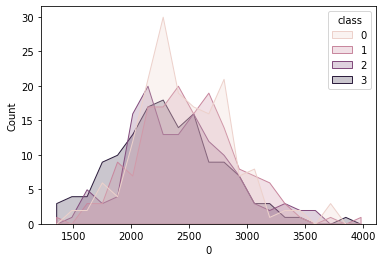

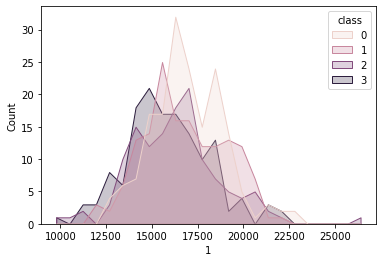

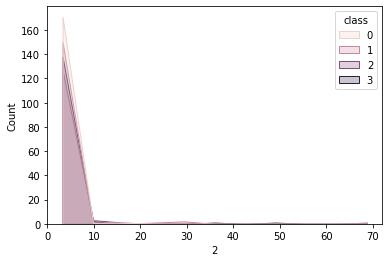

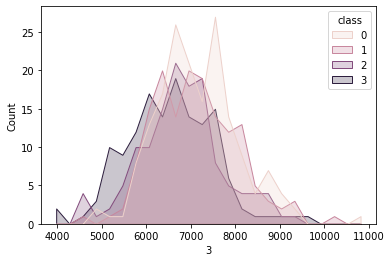

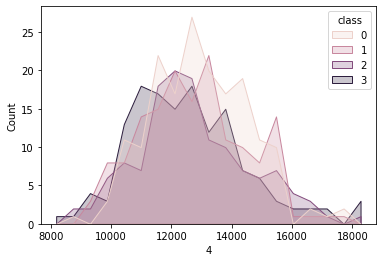

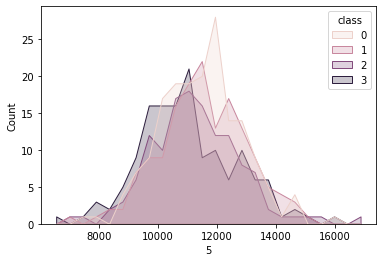

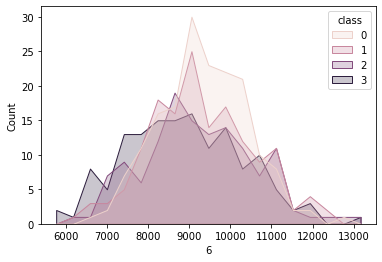

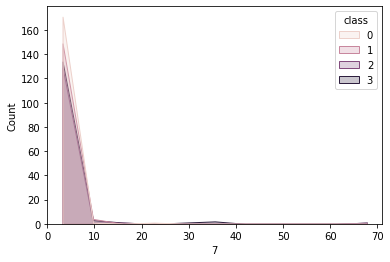

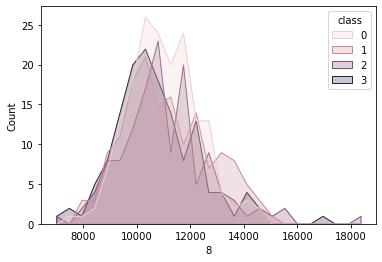

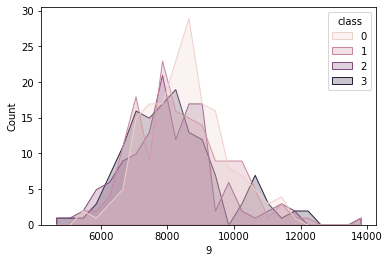

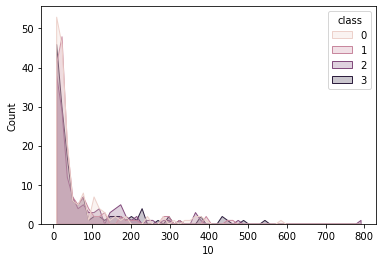

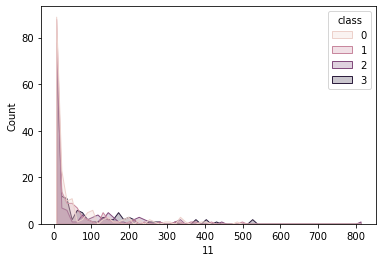

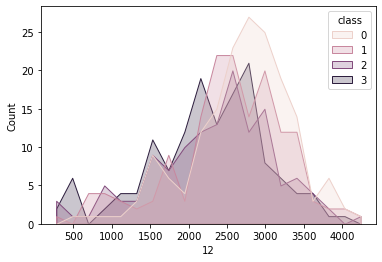

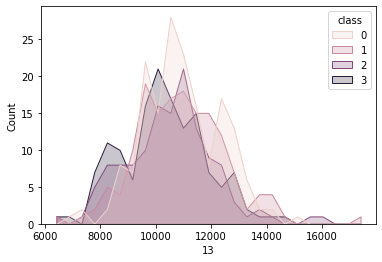

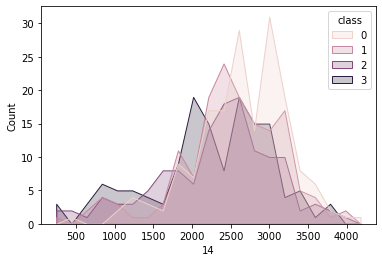

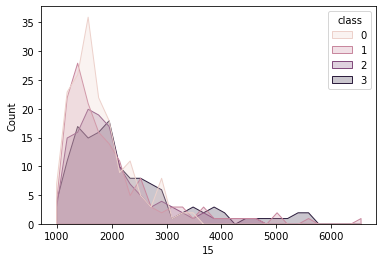

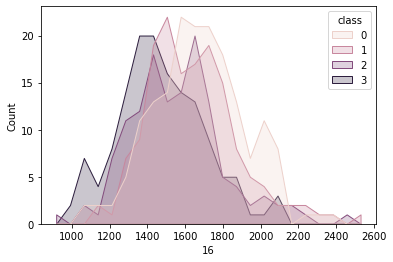

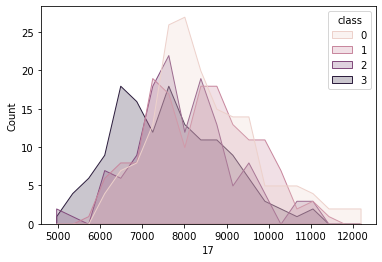

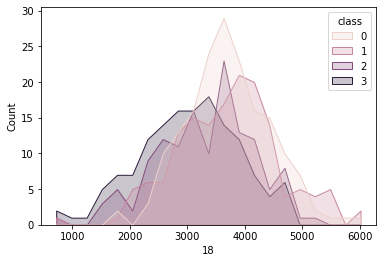

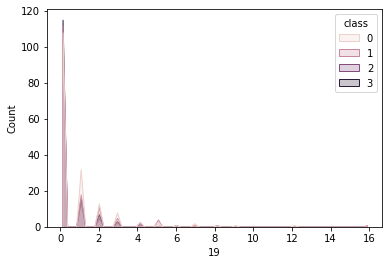

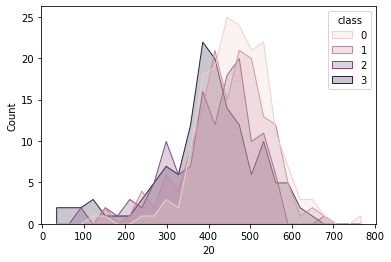

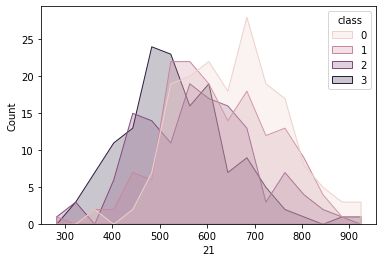

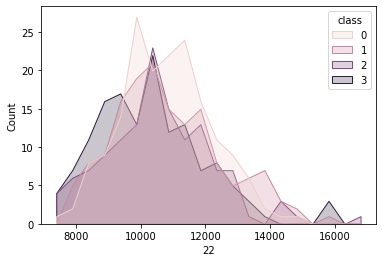

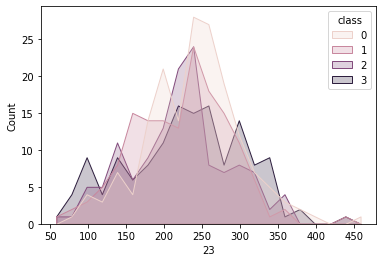

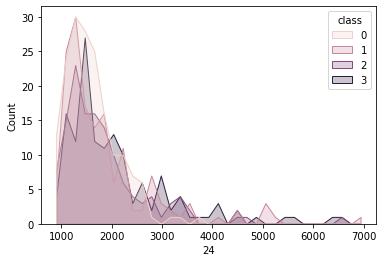

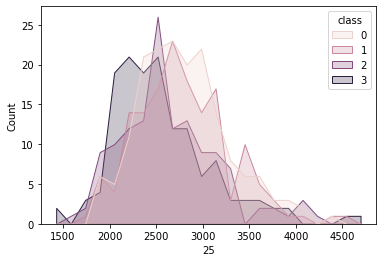

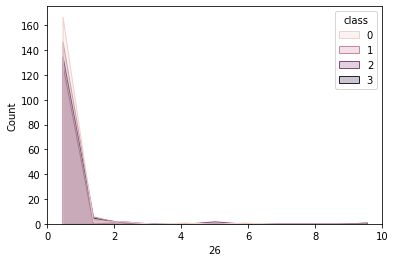

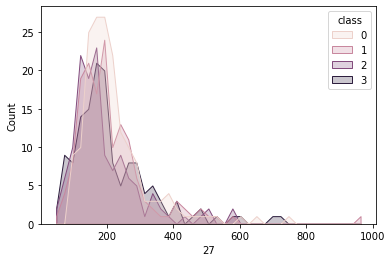

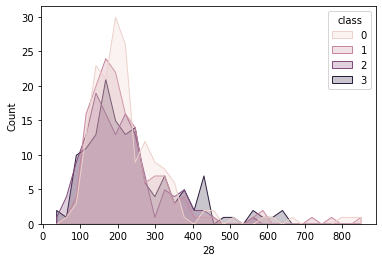

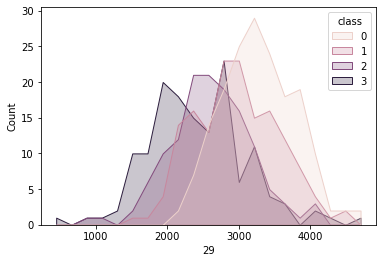

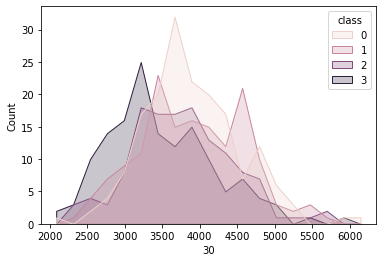

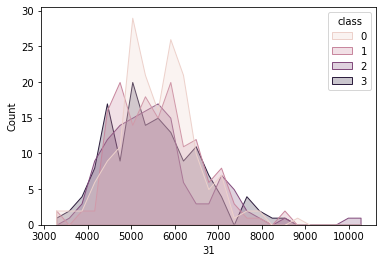

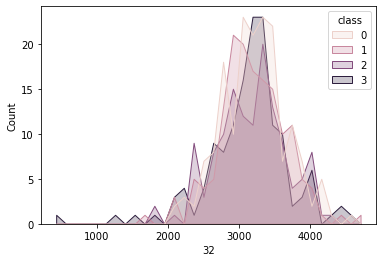

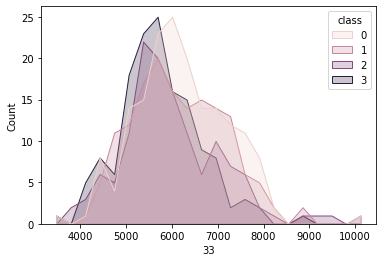

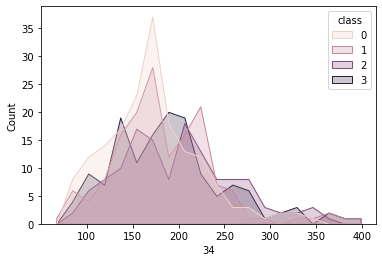

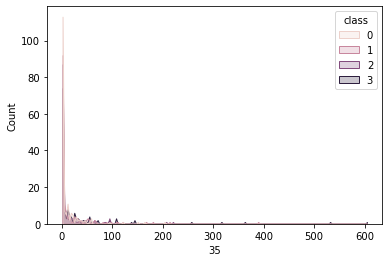

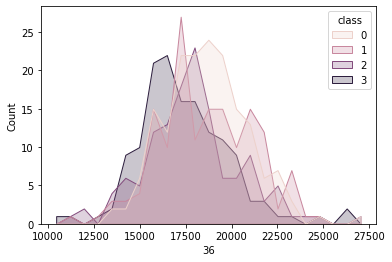

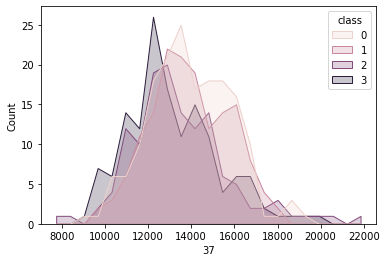

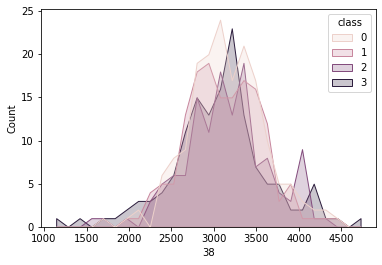

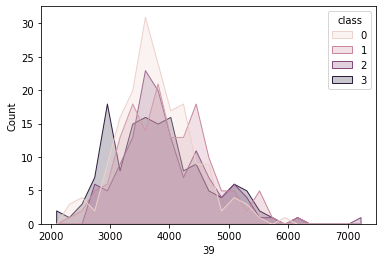

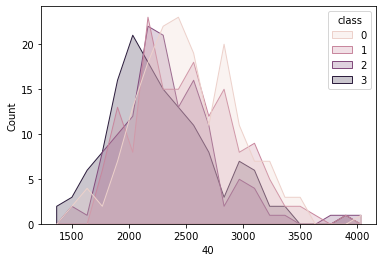

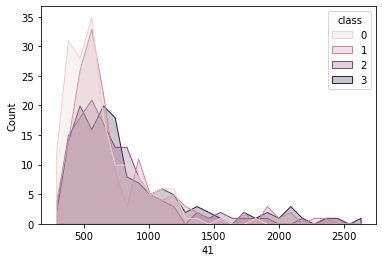

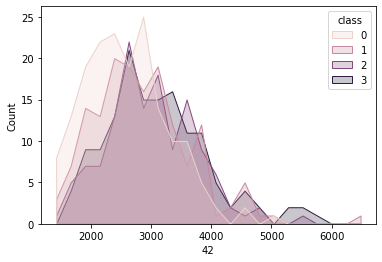

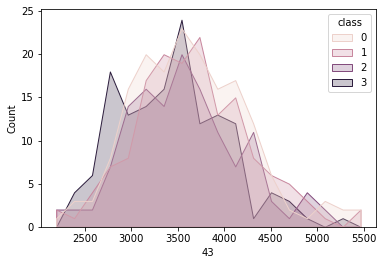

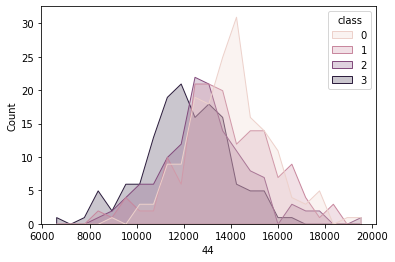

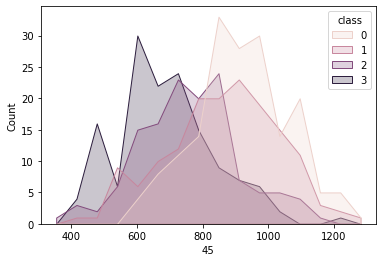

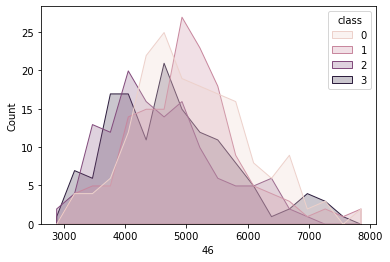

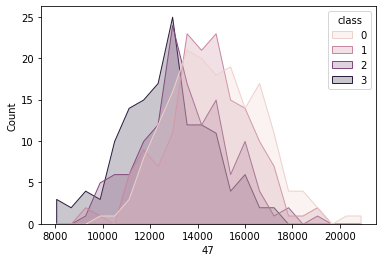

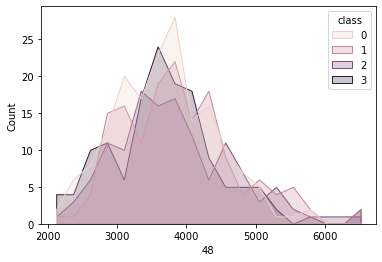

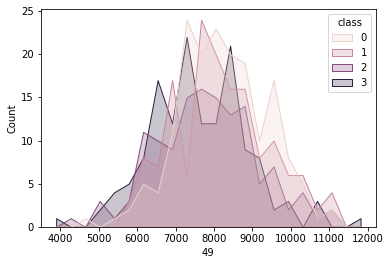

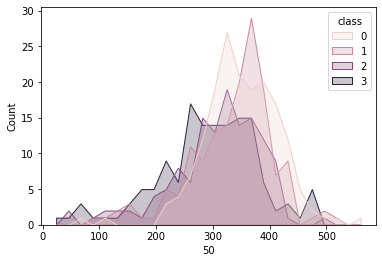

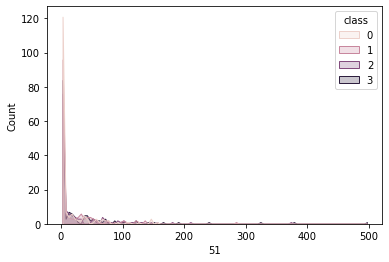

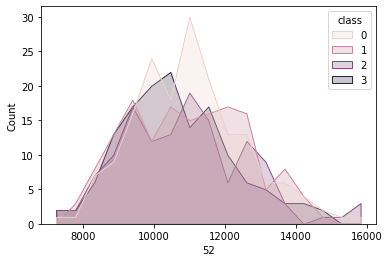

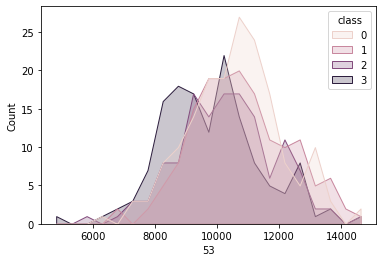

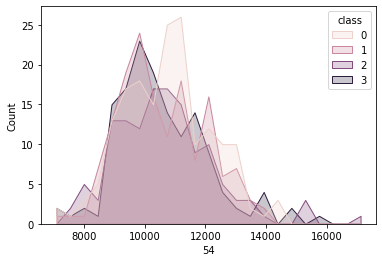

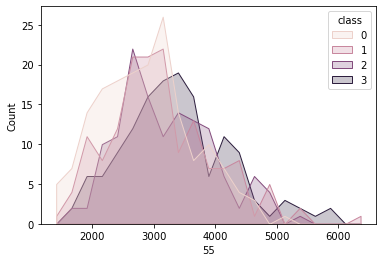

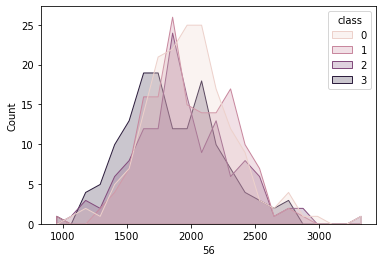

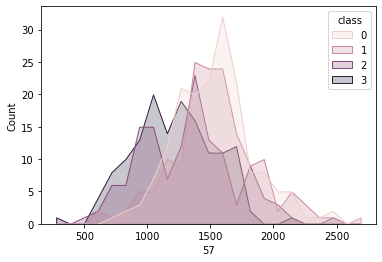

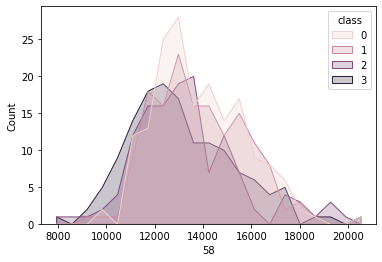

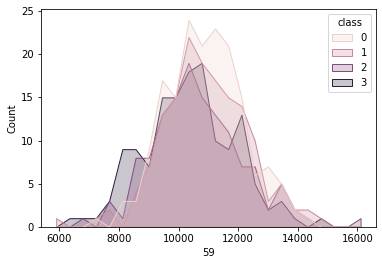

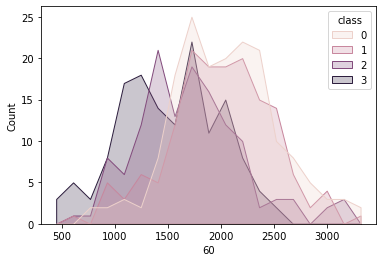

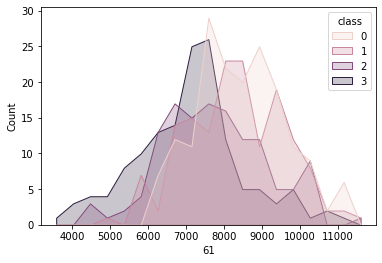

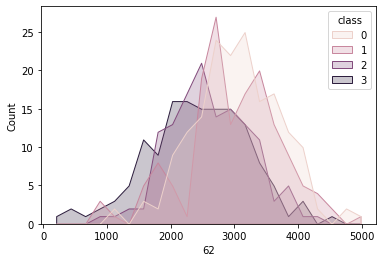

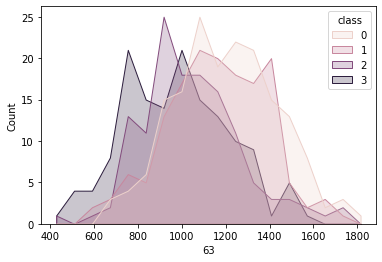

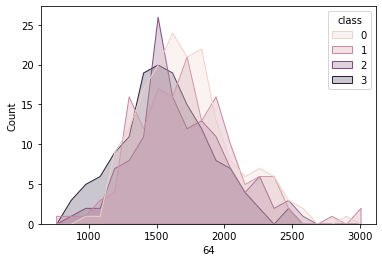

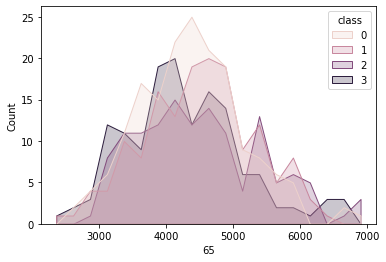

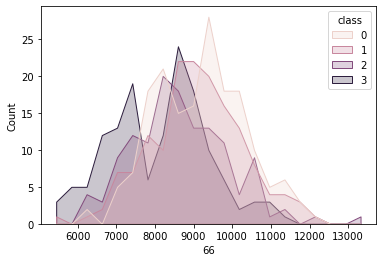

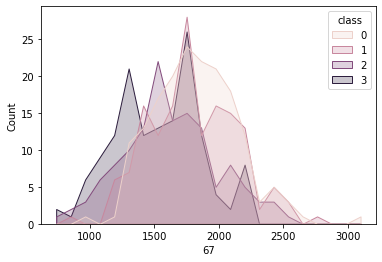

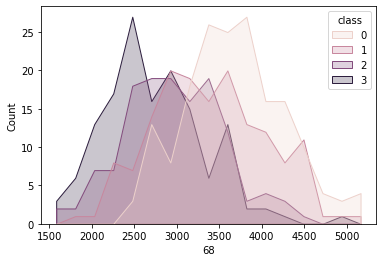

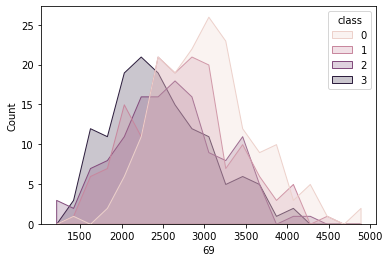

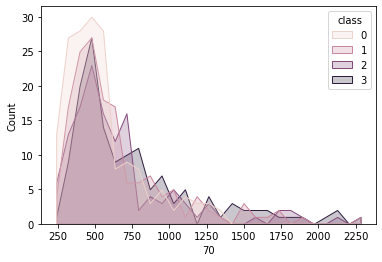

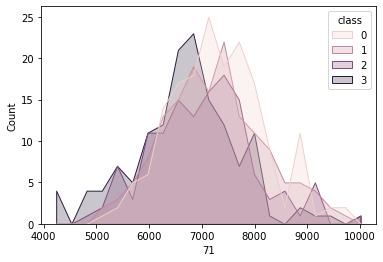

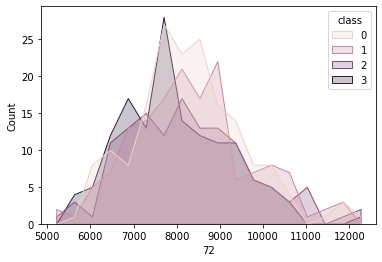

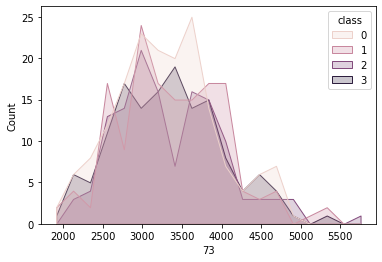

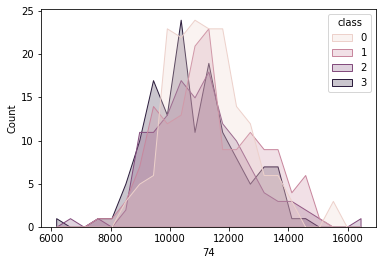

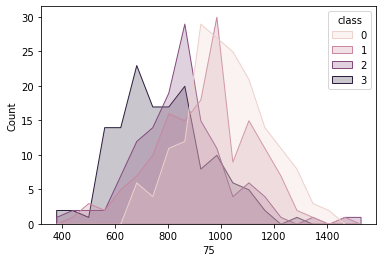

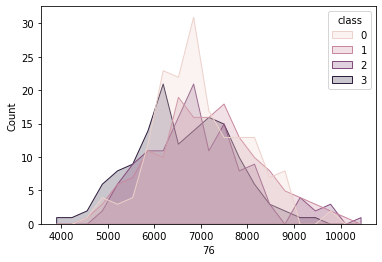

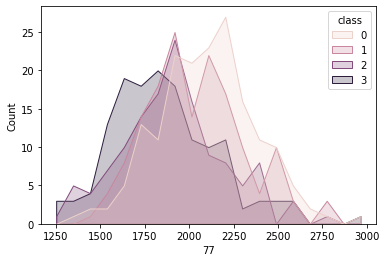

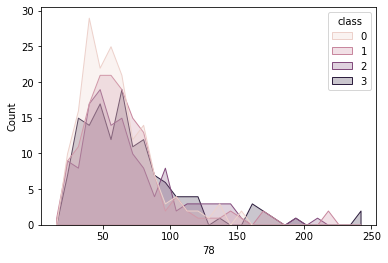

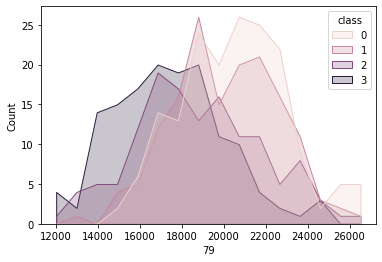

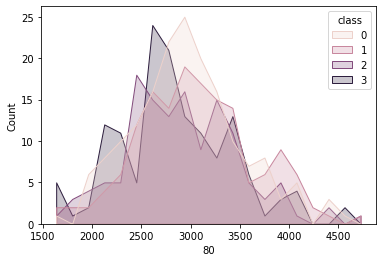

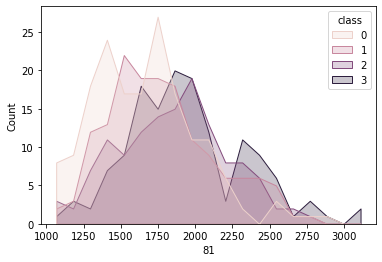

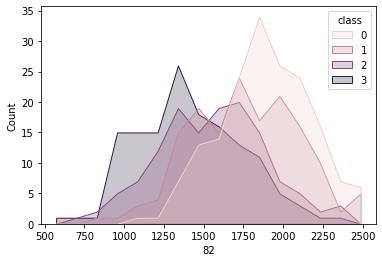

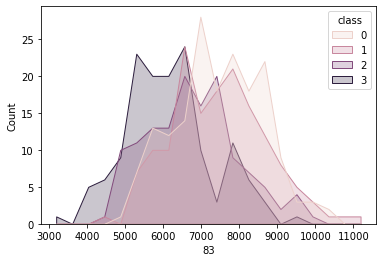

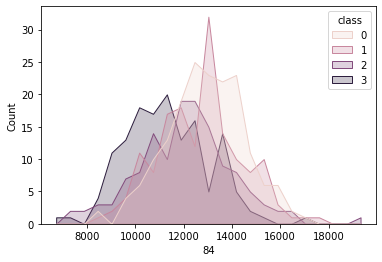

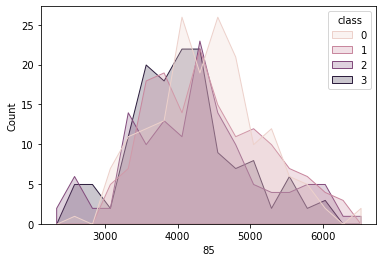

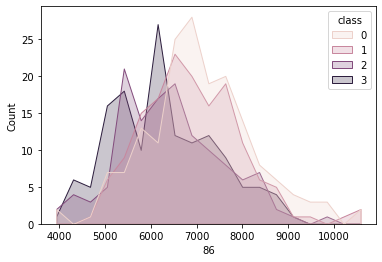

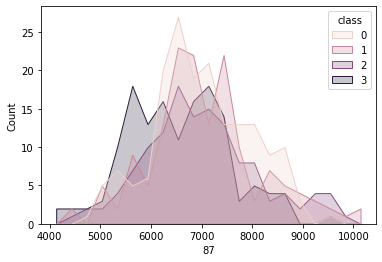

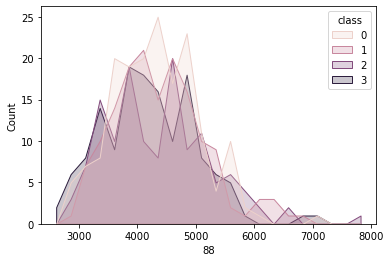

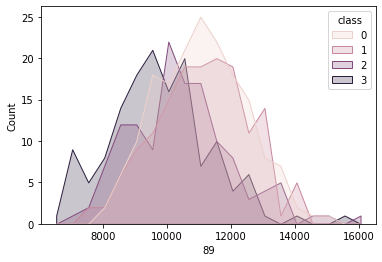

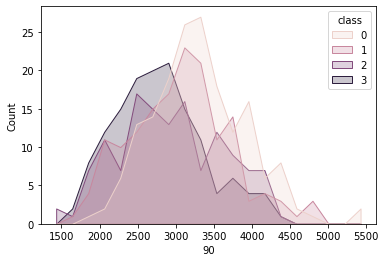

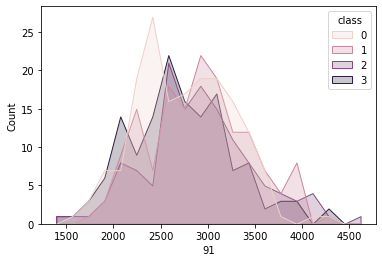

In [22]:
# display(df_strain.head(2))
# display(df_ytrain.head(2))
plt.rcParams.update({'figure.max_open_warning': 0})

df_ytrain.rename(columns = {'0' : 'class'}, inplace = True)

df_xy = pd.concat([df_xtrain.iloc[:,0:92], df_ytrain], axis=1)
display(df_xy.head(3))
#df_sy.columns = ["yield", "class"]

# print_df_info( (df_xy.iloc[ df_sy["class"]==0, : ]) )
# print_df_info( (df_xy.iloc[ df_sy["class"]==1, : ]) )
# print_df_info( (df_xy.iloc[ df_sy["class"]==2, : ]) )
# print_df_info( (df_xy.iloc[ df_sy["class"]==3, : ]) )

print(df_xy.columns)


#fig, axes = plt.subplots(24,4, figsize=(200, 200))
# for i in range(0,92) :
#     sns.histplot(ax=axes[i//4, i%4], data=df_xy, x=str(i), hue="class", element="poly")
# plt.show()

from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('xtrain_0to92_class_dist.pdf') as pdf_pages:
    for i in range(0,92) :
        fig = plt.figure(i)
        sns.histplot(data=df_xy, x=str(i), hue="class", element="poly")
        plt.show()
        fig.savefig(pdf_pages, format='pdf')


In [ ]:
from tqdm import tqdm, trange
import time

for i in tqdm(range(100), desc="Test1") :
    time.sleep(0.001)
    
for i in tqdm(range(100), desc="Test2") :
    time.sleep(0.001)

## Check Distribusion of Each Class and A/B for 2191~2193/yield

In [62]:
## X col 2191~2193   +   S   +   Y
df_xsy = pd.concat([df_xtrain.iloc[:, 2191:2194], df_sy], axis=1)

display(type(df_xsy))
display(df_xsy.head(3))
print(df_xsy.loc[:, "2193"])

col = "2193"
df_xsy.loc[(df_xsy["2193"] == 'A'),col]=0
df_xsy.loc[(df_xsy["2193"] == 'B'),col]=1

print(df_xsy.loc[:, "2193"])

pandas.core.frame.DataFrame

,2191,2192,2193,yield,class
0,34.9,0.9,A,0.933333,0
1,26.4,0.8,B,0.966667,0
2,29.4,0.8,A,1.000000,0


0      A
1      B
2      A
3      A
4      B
      ..
595    A
596    B
597    B
598    A
599    B
Name: 2193, Length: 600, dtype: object
0      0
1      1
2      0
3      0
4      1
      ..
595    0
596    1
597    1
598    0
599    1
Name: 2193, Length: 600, dtype: object


0it [00:00, ?it/s]

0 2191
[ 4.6  5.3  6.3  7.2  7.8  8.   8.5  8.6  9.   9.4  9.8  9.9 10.  10.2
 10.4 11.1 11.4 11.6 11.7 12.1 12.2 12.3 12.4 12.5 12.7 12.9 13.1 13.3
 13.7 14.  14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.2 15.3 15.4
 15.5 15.6 15.7 15.8 15.9 16.  16.4 16.6 17.1 17.2 17.3 17.5 17.6 17.7
 17.9 18.  18.1 18.2 18.4 18.5 18.6 18.9 19.  19.1 19.2 19.3 19.4 19.5
 19.6 19.7 19.8 20.  20.1 20.2 20.3 20.5 20.6 20.7 20.8 20.9 21.  21.1
 21.2 21.3 21.4 21.5 21.6 21.7 21.9 22.  22.1 22.2 22.3 22.4 22.5 22.6
 22.7 22.8 22.9 23.  23.2 23.3 23.4 23.5 23.6 23.7 23.8 23.9 24.  24.1
 24.2 24.3 24.4 24.5 24.6 24.7 24.8 24.9 25.  25.1 25.2 25.3 25.4 25.5
 25.6 25.7 25.8 25.9 26.  26.1 26.2 26.3 26.4 26.5 26.6 26.7 26.8 26.9
 27.  27.1 27.2 27.3 27.4 27.5 27.6 27.7 27.8 27.9 28.  28.1 28.2 28.3
 28.4 28.5 28.6 28.7 28.9 29.  29.1 29.2 29.3 29.4 29.5 29.6 29.7 29.8
 29.9 30.  30.1 30.2 30.3 30.4 30.5 30.6 30.8 30.9 31.  31.1 31.2 31.3
 31.4 31.5 31.6 31.7 31.8 31.9 32.  32.1 32.2 32.3 32.4 32.5 32.6 32.7

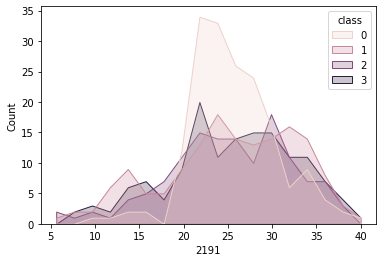

1it [00:00,  6.27it/s]

1 2192
[0.2  0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85 0.9
 0.95 1.  ]


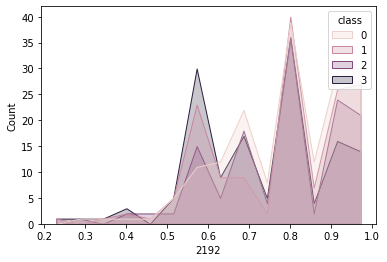

2it [00:00,  3.31it/s]

2 2193
[0 1]


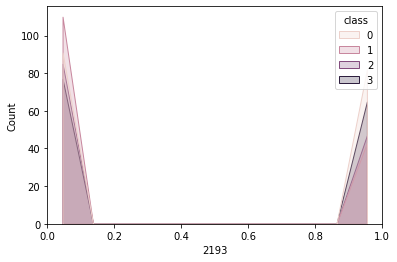

3it [00:00,  4.52it/s]

3 yield
[0.6        0.66666667 0.7        0.73333333 0.76666667 0.8
 0.83333333 0.86666667 0.9        0.93333333 0.96666667 1.        ]


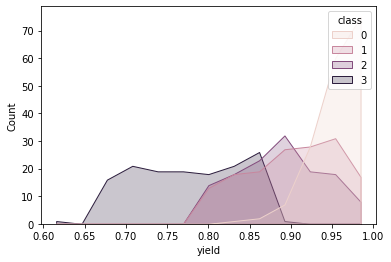

5it [00:00,  5.94it/s]


4 class
[0 1 2 3]


0it [00:00, ?it/s]

0 2191
[ 4.6  5.3  6.3  7.2  7.8  8.   8.5  8.6  9.   9.4  9.8  9.9 10.  10.2
 10.4 11.1 11.4 11.6 11.7 12.1 12.2 12.3 12.4 12.5 12.7 12.9 13.1 13.3
 13.7 14.  14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.2 15.3 15.4
 15.5 15.6 15.7 15.8 15.9 16.  16.4 16.6 17.1 17.2 17.3 17.5 17.6 17.7
 17.9 18.  18.1 18.2 18.4 18.5 18.6 18.9 19.  19.1 19.2 19.3 19.4 19.5
 19.6 19.7 19.8 20.  20.1 20.2 20.3 20.5 20.6 20.7 20.8 20.9 21.  21.1
 21.2 21.3 21.4 21.5 21.6 21.7 21.9 22.  22.1 22.2 22.3 22.4 22.5 22.6
 22.7 22.8 22.9 23.  23.2 23.3 23.4 23.5 23.6 23.7 23.8 23.9 24.  24.1
 24.2 24.3 24.4 24.5 24.6 24.7 24.8 24.9 25.  25.1 25.2 25.3 25.4 25.5
 25.6 25.7 25.8 25.9 26.  26.1 26.2 26.3 26.4 26.5 26.6 26.7 26.8 26.9
 27.  27.1 27.2 27.3 27.4 27.5 27.6 27.7 27.8 27.9 28.  28.1 28.2 28.3
 28.4 28.5 28.6 28.7 28.9 29.  29.1 29.2 29.3 29.4 29.5 29.6 29.7 29.8
 29.9 30.  30.1 30.2 30.3 30.4 30.5 30.6 30.8 30.9 31.  31.1 31.2 31.3
 31.4 31.5 31.6 31.7 31.8 31.9 32.  32.1 32.2 32.3 32.4 32.5 32.6 32.7

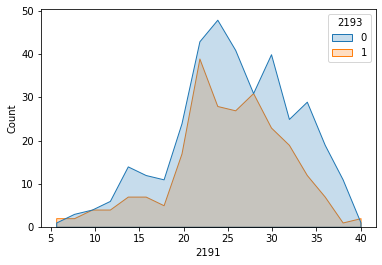

1it [00:00,  7.14it/s]

1 2192
[0.2  0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85 0.9
 0.95 1.  ]


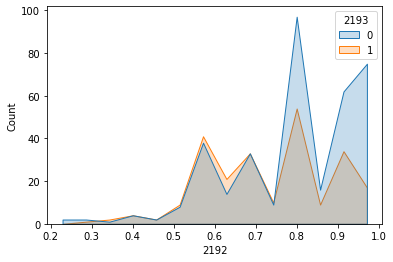

2it [00:00,  7.00it/s]

2 2193
[0 1]
3 yield
[0.6        0.66666667 0.7        0.73333333 0.76666667 0.8
 0.83333333 0.86666667 0.9        0.93333333 0.96666667 1.        ]


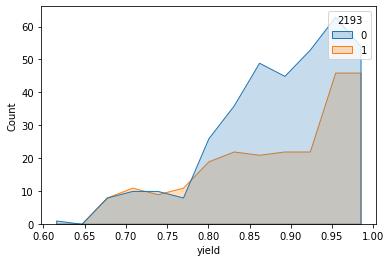

4it [00:00,  9.92it/s]

4 class
[0 1 2 3]


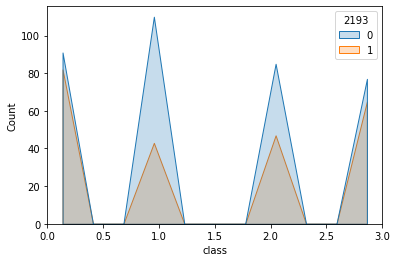

5it [00:00,  8.57it/s]


In [65]:

list_xsy_col_name = list(df_xsy.columns)
list_xsy_col_name

## Dist by Class 
with PdfPages('xsy_2191to2193_dist.pdf') as pdf_pages:
    for i, col in tqdm(enumerate(list_xsy_col_name)) :
        print(i,str(col))
        print(np.unique(np.array(df_xsy.loc[:,str(col)])))
        if str(col) == "class" : 
            pass
        else :
            fig = plt.figure(i)
            sns.histplot(data=df_xsy, x=str(col), hue="class", element="poly")
            plt.show()
            fig.savefig(pdf_pages, format='pdf')

## Dist by A/B (2193)
    for i, col in tqdm(enumerate(list_xsy_col_name)) :
        print(i,str(col))
        print(np.unique(np.array(df_xsy.loc[:,str(col)])))
        if str(col) == "2193" : 
            pass
        else :
            fig = plt.figure(i)
            sns.histplot(data=df_xsy, x=str(col), hue="2193", element="poly")
            plt.show()
            fig.savefig(pdf_pages, format='pdf')
            
# fig, axes = plt.subplots(24,4, figsize=(200, 200))
# for i in range(0,5) :
#     sns.histplot(ax=axes[i//4, i%4], data=df_xy, x=str(i), hue="class", element="poly")
# plt.show()


### Print Plots to PDF

In [ ]:

with PdfPages('xsy_2191to2193_dist.pdf') as pdf_pages:
    for i, col in tqdm(enumerate(list_xsy_col_name)) :
        print(i,str(col))
        print(np.unique(np.array(df_xsy.loc[:,str(col)])))
        if str(col) == "class" : 
            pass
        else :
            fig = plt.figure(i)
            sns.histplot(data=df_xsy, x=str(col), hue="class", element="poly")
            plt.show()
            fig.savefig(pdf_pages, format='pdf')

## Check 93~2090 distribution

In [89]:
display(df_xtrain_discrete.head(3))
display(df_xsy.head(3))

,93,94,95,96,97,98,99,100,101,102,...,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089
0,0,0,0,1,0,0,0,0,1,1,...,1,1,1,1,1,2,0,0,2,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,0,1,0,0,0,2,...,0,0,1,1,1,1,1,0,0,1


,2191,2192,2193,yield,class
0,34.9,0.9,0,0.933333,0
1,26.4,0.8,1,0.966667,0
2,29.4,0.8,0,1.000000,0


In [127]:
list_id= [range(0,601)]
df_discrete_cnt = df_xsy.copy()
display(df_discrete_cnt.index)
df_discrete_cnt["id"] = list(range(1,601))
df_discrete_cnt["sum"] = np.zeros(600)


for n, row in enumerate(list(df_xtrain_discrete.index)) :
    df_discrete_cnt.loc[row, "id"] = n
    df_discrete_cnt.loc[row, "count"] = np.sum(np.array(df_xtrain_discrete.loc[n,:]))
#     print(np.unique(np.array(df_xtrain_discrete.loc[row,:]), return_counts=True))
#     print("[", n ,"]", np.sum(np.array(df_xtrain_discrete.loc[n,:])))
    
#df_discrete_cnt = pd.concat([df_discrete_cnt, df_xsy], axis=1)
display(df_discrete_cnt.head(3))

RangeIndex(start=0, stop=600, step=1)

,2191,2192,2193,yield,class,id,count
0,34.9,0.9,0,0.933333,0,0,1093.0
1,26.4,0.8,1,0.966667,0,1,0.0
2,29.4,0.8,0,1.000000,0,2,1047.0


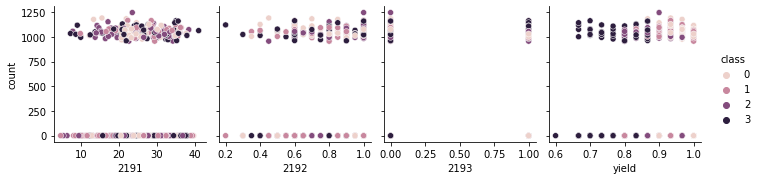

In [130]:

sns.pairplot(df_discrete_cnt, x_vars=['2191', '2192', '2193', 'yield'],
            y_vars=['count'], hue='class' )
plt.show()

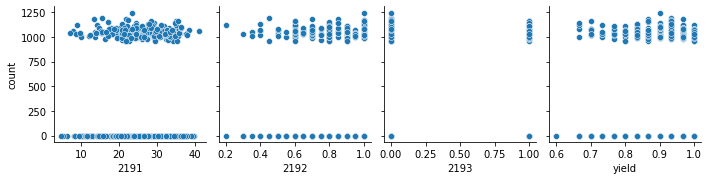

In [131]:
sns.pairplot(df_discrete_cnt, x_vars=['2191', '2192', '2193', 'yield'],
            y_vars=['count'])
plt.show()

In [141]:
for n, row in enumerate(list(df_xtrain_discrete.index)) :
#     df_discrete_cnt.loc[row, "id"] = n
#     df_discrete_cnt.loc[row, "count"] = np.sum(np.array(df_xtrain_discrete.loc[n,:]))
    unique, cnt = np.unique(np.array(df_xtrain_discrete.loc[row,:]), return_counts=True)
    print("UNIQUE : ", unique)
    print("Counts : ", cnt)
    #print("[", n ,"]", np.sum(np.array(df_xtrain_discrete.loc[n,:])))
#     print(df_xtrain_discrete.loc[row,:].value_counts)
#df_discrete_cnt = pd.concat([df_discrete_cnt, df_xsy], axis=1)
display(df_discrete_cnt.head(3))

UNIQUE :  [0 1 2]
Counts :  [1049  803  145]
UNIQUE :  [0]
Counts :  [1997]
UNIQUE :  [0 1 2]
Counts :  [1100  747  150]
UNIQUE :  [0]
Counts :  [1997]
UNIQUE :  [0]
Counts :  [1997]
UNIQUE :  [0 1 2]
Counts :  [1138  677  182]
UNIQUE :  [0]
Counts :  [1997]
UNIQUE :  [0 1 2]
Counts :  [1163  661  173]
UNIQUE :  [0 1 2]
Counts :  [1164  687  146]
UNIQUE :  [0]
Counts :  [1997]
UNIQUE :  [0]
Counts :  [1997]
UNIQUE :  [0]
Counts :  [1997]
UNIQUE :  [0]
Counts :  [1997]
UNIQUE :  [0]
Counts :  [1997]
UNIQUE :  [0 1 2]
Counts :  [1129  709  159]
UNIQUE :  [0 1 2]
Counts :  [1181  624  192]
UNIQUE :  [0 1 2]
Counts :  [1111  707  179]
UNIQUE :  [0 1 2]
Counts :  [1084  750  163]
UNIQUE :  [0 1 2]
Counts :  [1133  684  180]
UNIQUE :  [0]
Counts :  [1997]
UNIQUE :  [0]
Counts :  [1997]
UNIQUE :  [0]
Counts :  [1997]
UNIQUE :  [0 1 2]
Counts :  [1140  686  171]
UNIQUE :  [0 1 2]
Counts :  [1082  736  179]
UNIQUE :  [0]
Counts :  [1997]
UNIQUE :  [0]
Counts :  [1997]
UNIQUE :  [0 1 2]
Counts :

UNIQUE :  [0]
Counts :  [1997]
UNIQUE :  [0 1 2]
Counts :  [1106  706  185]
UNIQUE :  [0 1 2]
Counts :  [1061  704  232]
UNIQUE :  [0]
Counts :  [1997]
UNIQUE :  [0]
Counts :  [1997]
UNIQUE :  [0]
Counts :  [1997]
UNIQUE :  [0 1 2]
Counts :  [1162  626  209]
UNIQUE :  [0]
Counts :  [1997]
UNIQUE :  [0]
Counts :  [1997]
UNIQUE :  [0]
Counts :  [1997]
UNIQUE :  [0]
Counts :  [1997]
UNIQUE :  [0]
Counts :  [1997]
UNIQUE :  [0 1 2]
Counts :  [1167  675  155]
UNIQUE :  [0 1 2]
Counts :  [1131  715  151]
UNIQUE :  [0]
Counts :  [1997]
UNIQUE :  [0 1 2]
Counts :  [1189  653  155]
UNIQUE :  [0 1 2]
Counts :  [1143  711  143]
UNIQUE :  [0]
Counts :  [1997]
UNIQUE :  [0]
Counts :  [1997]
UNIQUE :  [0]
Counts :  [1997]
UNIQUE :  [0]
Counts :  [1997]
UNIQUE :  [0]
Counts :  [1997]
UNIQUE :  [0 1 2]
Counts :  [1154  667  176]
UNIQUE :  [0]
Counts :  [1997]
UNIQUE :  [0]
Counts :  [1997]
UNIQUE :  [0 1 2]
Counts :  [1124  686  187]
UNIQUE :  [0]
Counts :  [1997]
UNIQUE :  [0]
Counts :  [1997]
UNIQUE

,2191,2192,2193,yield,class,id,count
0,34.9,0.9,0,0.933333,0,0,1093.0
1,26.4,0.8,1,0.966667,0,1,0.0
2,29.4,0.8,0,1.000000,0,2,1047.0


## Print Image to PDF

In [ ]:
from PIL import Image


# 2022-1208_004.png
# 2022-1208_036.png
# C:\Users\SNUAI\Documents\Sean-Pick
path_png = "c:/Users/SNUAI/Documents/Sean-Pick/2022-1208_0"
#!pip install fpdf

!pwd

from fpdf import FPDF
pdf = FPDF()
# imagelist is the list with all image filenames
for i in range(4,37):
    img = path_png + f"{i:02}" + ".png"
    #display(img)
    cover = Image.open(img)
    width, height = cover.size
    
    pdf.add_page()
    # 1 px = 0.264583 mm (FPDF default is mm)
    pdf.image(img, 0, 0, float(width * 0.264583)*0.6, float(height * 0.264583)*0.6)
    #pdf.image(img)
pdf.output("feature_for_class.pdf")

In [ ]:
print(np.unique(np.array(df_xsy.loc[:,str(col)])))
